In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from trsm import TRSM, combos_6j#, pairs_2j

In [4]:
import os
os.getcwd()

'/uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_2_18/src/sixb/6jet_classifier/analyzers'

In [5]:
filename = f'../../NMSSM_XYH_YToHH_6b_MX_700_MY_400_6jet_testing_set.root'
trsm_set = TRSM(filename=filename)

In [6]:
tag = 'evans_preselections_2HL_v3_fixed-bug-no-6-jet-requirement'

In [7]:
combos7 = combos_6j(trsm_set, 7)

100%|████████████████████████████████████████████████████████| 35309/35309 [01:17<00:00, 454.13it/s]


Total events chosen: 35309


In [8]:
combos7.apply_6j_model(tag)
scores_7 = combos7.scores_combo

2021-08-10 14:35:37.642391: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-08-10 14:35:39.295157: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-08-10 14:35:39.296923: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2000000000 Hz


In [9]:
combos7.create_pairs(tag)

In [10]:
combos7.pair_features.shape

[autoreload of trsm failed: Traceback (most recent call last):
  File "/uscms/home/srosenzw/nobackup/miniconda3/envs/work/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/uscms/home/srosenzw/nobackup/miniconda3/envs/work/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/uscms/home/srosenzw/nobackup/miniconda3/envs/work/lib/python3.8/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/uscms/home/srosenzw/nobackup/miniconda3/envs/work/lib/python3.8/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 604, in _exec
  File "<frozen importlib._bootstrap_external>", line 779, in exec_module
  File "<frozen importlib._bootstrap_external>", line 916, in get_code
  File "<frozen importlib._bootstrap_external>", line 846, in source_to_code
  Fil

(3707445, 9)

In [11]:
combos7.pair_target

array([-1, -1, -1, ..., -1, -1, -1])

In [1]:
import numpy as np

In [12]:
np.savez("../../inputs_2jet_train.npz", inputs=combos7.pair_features, targets=combos7.target)

AttributeError: 'combos_6j' object has no attribute 'target'

(array([3275495.,       0.,       0.,  148310.,       0.,       0.,
         149100.,       0.,       0.,  134540.]),
 array([-1. , -0.7, -0.4, -0.1,  0.2,  0.5,  0.8,  1.1,  1.4,  1.7,  2. ]),
 [<matplotlib.patches.Polygon at 0x7f60b675bbb0>])

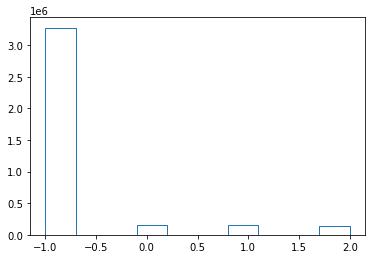

In [17]:
plt.hist(combos7.pair_target, histtype='step')

In [ ]:
# pairs = pairs_2j(combos7)

In [36]:
import awkward as ak
import numpy as np

In [37]:
%matplotlib widget

In [15]:
import matplotlib.pyplot as plt
from consistent_plots import hist, hist2d

In [39]:
np.sum(combos7.sgnl_mask)/len(combos7.sgnl_mask)

0.07617240444564922

In [55]:
np.sum(combos7.sgnl_mask[scores_7 > 0.8])/len(combos7.sgnl_mask)

0.04536682270404551

In [41]:
def norm_hist(arr, bins=100):
    n, b = np.histogram(arr, bins=bins)
    x = (b[:-1] + b[1:]) / 2
    
    return n/n.max(), b, x

In [42]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,3))

ax = axs[0]
ax.set_title(r"$^7C_6$ Combinations Normalized")

n_7, b_7, x_7 = norm_hist(scores_7)
c_n_7, b_7, x_7 = norm_hist(scores_7[combos7.sgnl_mask])
w_n_7, b_7, x_7 = norm_hist(scores_7[~combos7.sgnl_mask])

hist(ax, x_7, weights=n_7, bins=b_7, label='All 6-jet combos')
hist(ax, x_7, weights=c_n_7, bins=b_7, label='Correct 6-jet combo')
hist(ax, x_7, weights=w_n_7, bins=b_7, label='Incorrect 6-jet combo')
ax.legend(fontsize='small', loc=9)

ax.set_xlabel('Assigned Score')
ax.set_ylabel('AU')

textstr = f'Entries = {len(scores_7)}'
props = dict(boxstyle='round', facecolor='white', alpha=1)
ax.text(0.8, 1.02, textstr, transform=ax.transAxes, fontsize=9,
        verticalalignment='top', bbox=props)

ax = axs[1]
ax.set_title(r"$^7C_6$ Combinations")

n_7, b_7 = np.histogram(scores_7, bins=100)
c_n_7, b_7 = np.histogram(scores_7[combos7.sgnl_mask], bins=100)
w_n_7, b_7 = np.histogram(scores_7[~combos7.sgnl_mask], bins=100)

x_7 = (b_7[1:] + b_7[:-1]) / 2

hist(ax, x_7, weights=n_7, bins=b_7, label='All 6-jet combos')
hist(ax, x_7, weights=c_n_7, bins=b_7, label='Correct 6-jet combo')
hist(ax, x_7, weights=w_n_7, bins=b_7, label='Incorrect 6-jet combo')
ax.legend(fontsize='small', loc=9)

ax.set_xlabel('Assigned Score')
ax.set_ylabel('Number of Combinations Per Bin')

textstr = f'Entries = {len(scores_7)}'
props = dict(boxstyle='round', facecolor='white', alpha=1)
ax.text(0.8, 1.02, textstr, transform=ax.transAxes, fontsize=9,
        verticalalignment='top', bbox=props)

plt.tight_layout()
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [43]:
pt_7  = combos7.combo_features[:,0:6]
eta_7 = combos7.combo_features[:,6:12]
phi_7 = combos7.combo_features[:,12:18]
m_7   = np.ones(pt_7.shape)*4

In [44]:
import vector

In [45]:
p4_7_0 = vector.obj(pt=pt_7[:,0], eta=eta_7[:,0], phi=phi_7[:,0], mass=m_7[:,0])
p4_7_1 = vector.obj(pt=pt_7[:,1], eta=eta_7[:,1], phi=phi_7[:,1], mass=m_7[:,1])
p4_7_2 = vector.obj(pt=pt_7[:,2], eta=eta_7[:,2], phi=phi_7[:,2], mass=m_7[:,2])
p4_7_3 = vector.obj(pt=pt_7[:,3], eta=eta_7[:,3], phi=phi_7[:,3], mass=m_7[:,3])
p4_7_4 = vector.obj(pt=pt_7[:,4], eta=eta_7[:,4], phi=phi_7[:,4], mass=m_7[:,4])
p4_7_5 = vector.obj(pt=pt_7[:,5], eta=eta_7[:,5], phi=phi_7[:,5], mass=m_7[:,5])

In [46]:
p4_7 = p4_7_0 + p4_7_1 + p4_7_2 + p4_7_3 + p4_7_4 + p4_7_5

In [47]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

ax[0].set_title("Signal 7 Combos")
ax[1].set_title("Background 7 Combos")

n, xedges, yedges, ims = hist2d(ax[0], p4_7.mass[combos7.sgnl_mask], scores_7[combos7.sgnl_mask], xbins=np.linspace(400,900,100))
n, xedges, yedges, imb = hist2d(ax[1], p4_7.mass[~combos7.sgnl_mask], scores_7[~combos7.sgnl_mask], xbins=np.linspace(0,2000,100))

plt.colorbar(ims, ax=ax[0])
plt.colorbar(imb, ax=ax[1])

ax[0].set_xlabel('Invariant Mass of 6-jet System [GeV]')
ax[1].set_xlabel('Invariant Mass of 6-jet System [GeV]')
ax[0].set_ylabel('Assigned Score')
ax[1].set_ylabel('Assigned Score')

plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [48]:
score_bins = np.arange(0,1.01,0.01)

In [49]:
eff_7 = np.array(())
for i in score_bins:
    eff_7 = np.append(eff_7, int(np.sum(scores_7[combos7.sgnl_mask] > i)/len(scores_7[combos7.sgnl_mask])*100))

In [50]:
mistag_7 = np.array(())
for i in score_bins:
    mistag_7 = np.append(mistag_7, int(np.sum(scores_7[~combos7.sgnl_mask] > i)/len(scores_7[~combos7.sgnl_mask])*100))

In [51]:
dx = mistag_7[:-1] - mistag_7[1:]

In [52]:
height = eff_7[:-1] + eff_7[1:]

In [53]:
area_trapezoid = height / 2 * dx

In [54]:
auc = np.sum(area_trapezoid) / 100**2

In [ ]:
# fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

# ax = axs[0]
# ax.set_title(r"$^7C_6$ Combinations Efficiency Curve")

# ax.plot(score_bins, eff_7)
# ax.set_ylabel('% Passing Signal')
# ax.set_xlabel('Assigned Score Cut')

# ax = axs[1]
# ax.set_title(r"$^7C_6$ Combinations Mistag Curve")

# ax.plot(score_bins, mistag_7)
# ax.set_ylabel('% Passing Background')
# ax.set_xlabel('Assigned Score Cut')

In [56]:
fig, ax = plt.subplots()
ax.set_title(r"$^7C_6$ Combinations ROC")

ax.plot(mistag_7, eff_7)
# ax.scatter(mistag_7[::10], eff_7[::10], s=20, color='orange')
ax.set_ylabel('True Positives %')
ax.set_xlabel('False Positives %')

n = np.around(np.arange(0,1.1,0.1), 1)
for i, txt in enumerate(n):
    ax.plot([mistag_7[i*10], mistag_7[i*10]], [0, eff_7[i*10]], alpha=0.3, color='k', lw=1)
    ax.plot([0, mistag_7[i*10]], [eff_7[i*10], eff_7[i*10]], alpha=0.3, color='k', lw=1)
    ax.annotate(txt, (0, eff_7[i*10]), fontsize=8)
    ax.annotate(eff_7[i*10], (10, eff_7[i*10]), fontsize=8)

props = dict(boxstyle='round', facecolor='white', alpha=0.5)
ax.text(0.75, 0.1, f"auc = {auc}", transform=ax.transAxes, bbox=props)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0.75, 0.1, 'auc = 0.83555')

In [59]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

ax[0].set_title("Signal 7 Combos")
ax[1].set_title("Background 7 Combos")

n, b, _ = hist(ax[0], p4_7.mass[combos7.sgnl_mask], bins=np.linspace(400,900,100), label='No cut', color='limegreen')
n, b, _ = hist(ax[0], p4_7.mass[combos7.sgnl_mask][scores_7[combos7.sgnl_mask] > 0.8], bins=np.linspace(400,900,100), label='score > 0.8', color='darkgreen')
n, b, _ = hist(ax[1], p4_7.mass[~combos7.sgnl_mask], bins=np.linspace(400,900,100), label='No cut', color='lightcoral')
n, b, _ = hist(ax[1], p4_7.mass[~combos7.sgnl_mask][scores_7[~combos7.sgnl_mask] > 0.8], bins=np.linspace(400,900,100), label='score > 0.8', color='maroon')
# n, xedges, yedges, imb = hist2d(ax[1], p4_7.mass[~combos7.sgnl_mask], scores_7[~combos7.sgnl_mask], xbins=np.linspace(0,2000,100))


ax[0].set_xlabel('Invariant Mass of 6-jet System [GeV]')
ax[1].set_xlabel('Invariant Mass of 6-jet System [GeV]')
ax[0].set_ylabel('Count')
ax[1].set_ylabel('Count')
ax[0].legend()
ax[1].legend()

plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [60]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(6,5), sharex=True, gridspec_kw={'height_ratios':[3,1]})

ns, b, _ = hist(ax[0], p4_7.mass[combos7.sgnl_mask][scores_7[combos7.sgnl_mask] > 0.8], bins=np.linspace(400,900,100), label='sgnl score > 0.8', color='darkgreen')
nb, b, _ = hist(ax[0], p4_7.mass[~combos7.sgnl_mask][scores_7[~combos7.sgnl_mask] > 0.8], bins=np.linspace(400,900,100), label='bkgd score > 0.8', color='maroon')
# n, xedges, yedges, imb = hist2d(ax[1], p4_7.mass[~combos7.sgnl_mask], scores_7[~combos7.sgnl_mask], xbins=np.linspace(0,2000,100))

x = (b[1:] + b[:-1])/2

ax[1].plot(x, ns/nb)
ax[1].plot(x, np.ones_like(x), '--k', alpha=0.2)

ax[1].set_xlabel('Invariant Mass of 6-jet System [GeV]')
ax[0].set_ylabel('Count')
ax[0].legend()

ax[1].set_ylabel(r'Ratio $S/B_C$')

plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [61]:
# plt.close('all')